# Final Project Submission

* Lauren Petrillo
* Part Time
* Scheduled project review date/time: 
* Claude Fried
* Blog post URL:


## Importing Data

Import Necessary Information to start project


In [2]:
#import necessary information to start the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
os.listdir('zippedData')

['bom.movie_gross.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

## Questions to Explore

1. What are the highest grossing genres? 
2. Do Directors affect the gross income?
3. What are the highest grossing studios?

# Gathering/Cleaning Data

## Movie Gross

In [3]:
#create a df for bom.movie_gross.csv.gz dataset to gather worldwide gross, titles, and studios
df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [4]:
df.head(5)
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [79]:
df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010
6,Iron Man 2,Par.,312400000.0,311500000.0,2010
7,Tangled,BV,200800000.0,391000000.0,2010
8,Despicable Me,Uni.,251500000.0,291600000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010


In [6]:
#transform domestic_gross and foreign_gross dtypes to float values
df[['domestic_gross', 'foreign_gross']] = df[['domestic_gross', 'foreign_gross']].apply(pd.to_numeric, errors='coerce')

In [7]:
#double-checking that the above column values are floats and not objects
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [8]:
#detect any missing values
df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [9]:
#detect sum of missing values
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [10]:
#dropping the duplicates
df.dropna(inplace=True)

In [11]:
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

## Movie Titles

In [12]:
#create df for imdb.titlel.basics.csv.gz to get the tconst, titles, and genres
df1=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df1.head()
df1.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
#detect sum of missing values
df1.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [15]:
#dropping the missing values
df1 = df1.dropna()

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
#check for duplicates in the tconst column
df1.drop_duplicates(subset='tconst', inplace=True)
df1.reset_index(drop=True, inplace=True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112232 entries, 0 to 112231
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [19]:
df1.tconst.unique()

array(['tt0063540', 'tt0066787', 'tt0069049', ..., 'tt9916186',
       'tt9916190', 'tt9916538'], dtype=object)

## Movie Ratings

In [20]:
#create df for imdb.title.ratings.csv.gz to access tconst and average rating
df2=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [21]:
df2.head()
df2.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [22]:
df2.head(20)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [23]:
#check the sum for the missing values
df2.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [24]:
#check duplicates for tconst
df2.drop_duplicates(subset='tconst', inplace=True)

In [25]:
df2.reset_index(drop=True, inplace=True)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Joining Titles & Ratings

In [27]:
df3 = df1.set_index('tconst').join(df2.set_index('tconst'), how='inner')

In [28]:
df3.head(200)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...
tt0775440,Cell,Cell,2016,98.0,"Action,Drama,Horror",4.3,21968
tt0775461,The Rain Fairy,Destová víla,2010,100.0,"Family,Fantasy",5.4,70
tt0775489,The Illusionist,L'illusionniste,2010,80.0,"Animation,Drama",7.5,31734


In [29]:
df3.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

# Genre Ratings vs. Genre Worldwide Gross

In [30]:
df4 = df3.set_index('primary_title').join(df.set_index('title'), how='inner').reset_index()

In [31]:
df4.head()

,index,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015
1,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016
2,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000.0,2018
3,11-11-11,11-11-11,2011,90.0,"Horror,Mystery,Thriller",4.0,11712,Rocket,32800.0,5700000.0,2011
4,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,WB,45800000.0,21600000.0,2018


In [32]:
genres = df4['genres'].apply(lambda g: g.split(',')).apply(lambda x: {A:1 for A in x}).values

In [33]:
genres_df = pd.DataFrame(list(genres)).fillna(0)

In [34]:
genres_df

,Action,Drama,Thriller,Horror,Mystery,Comedy,History,Biography,Adventure,Romance,...,Music,Fantasy,Animation,Western,War,Sci-Fi,Family,Musical,Sport,News
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1760,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1761,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
updated_genres_df = pd.concat([genres_df, df4], axis=1)

In [36]:
updated_genres_df['total_gross'] = updated_genres_df['domestic_gross'] + updated_genres_df['foreign_gross']

In [37]:
updated_genres_df[updated_genres_df['Action'] == 1]['averagerating'].mean()

6.400881057268722

In [38]:
x_values = genres_df.columns
y_values = []
for x in x_values:
    y_values.append(updated_genres_df[updated_genres_df[x] == 1]['averagerating'].mean())

In [39]:
genres_asc = pd.DataFrame([x_values, y_values]).T
genres_asc.sort_values(1, inplace=True)
genres_asc

,0,1
3,Horror,5.76474
19,Musical,6.11111
18,Family,6.15238
13,Fantasy,6.2125
4,Mystery,6.23485
2,Thriller,6.2472
5,Comedy,6.28013
9,Romance,6.37795
21,News,6.4
0,Action,6.40088


In [40]:
updated_genres_df

,Action,Drama,Thriller,Horror,Mystery,Comedy,History,Biography,Adventure,Romance,...,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015,1.655000e+06
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016,1.102000e+08
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2018,102.0,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000.0,2018,1.220000e+07
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2011,90.0,"Horror,Mystery,Thriller",4.0,11712,Rocket,32800.0,5700000.0,2011,5.732800e+06
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2018,130.0,"Action,Drama,History",6.6,50155,WB,45800000.0,21600000.0,2018,6.740000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2014,106.0,"Biography,Drama",6.2,10311,Wein.,724000.0,20300000.0,2014,2.102400e+07
1759,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2012,157.0,"Drama,Thriller",7.4,251072,Sony,95700000.0,37100000.0,2012,1.328000e+08
1760,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2011,102.0,"Comedy,Family,Romance",5.2,52396,Sony,80400000.0,89500000.0,2011,1.699000e+08
1761,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2016,101.0,Comedy,4.7,59914,Par.,28800000.0,27900000.0,2016,5.670000e+07


Text(0.5, 1.0, 'Genre Average Movie Ratings')

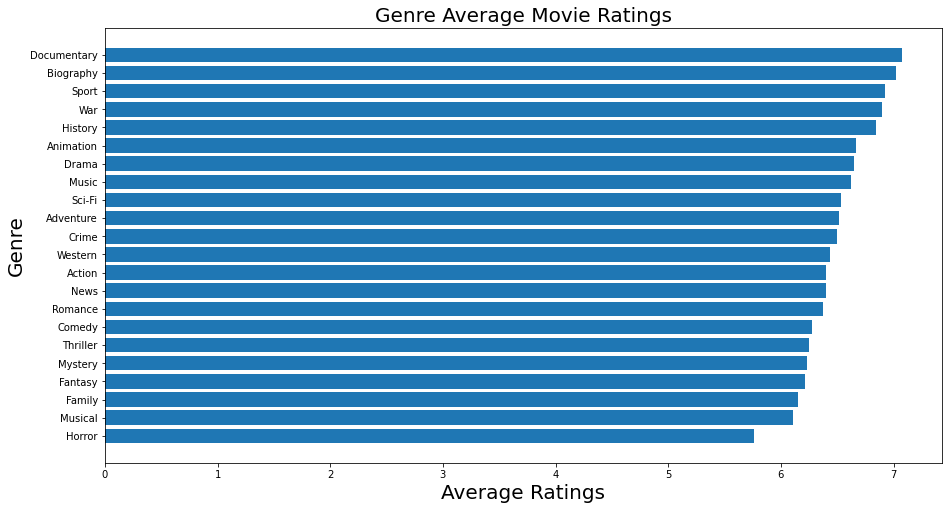

In [44]:
y_pos = len(x_values)
plt.figure(figsize = (15,8))
plt.barh(genres_asc[0], genres_asc[1])
plt.ylabel('Genre', fontsize = 20)
plt.xlabel('Average Ratings', fontsize = 20)
plt.title('Genre Average Movie Ratings', fontsize=20)

In [81]:
updated_genres_df = updated_genres_df[updated_genres_df['total_gross'] !=0]
updated_genres_df['total_gross'] = updated_genres_df['total_gross']

In [82]:
x_values = genres_df.columns
y_values = []
for x in x_values:
    y_values.append(updated_genres_df[updated_genres_df[x] == 1]['total_gross'].mean())

In [83]:
genres_asc_rev = pd.DataFrame([x_values, y_values]).T
genres_asc_rev.sort_values(1, inplace=True)
genres_asc_rev

,0,1
16,War,2.98105e+07
9,Romance,6.11862e+07
21,News,6.46e+07
6,History,6.9396e+07
1,Drama,7.0892e+07
11,Documentary,7.09802e+07
12,Music,7.14071e+07
10,Crime,7.58191e+07
7,Biography,7.9938e+07
4,Mystery,8.90767e+07


Text(0.5, 1.0, "Genre's Average Movie Worldwide Gross")

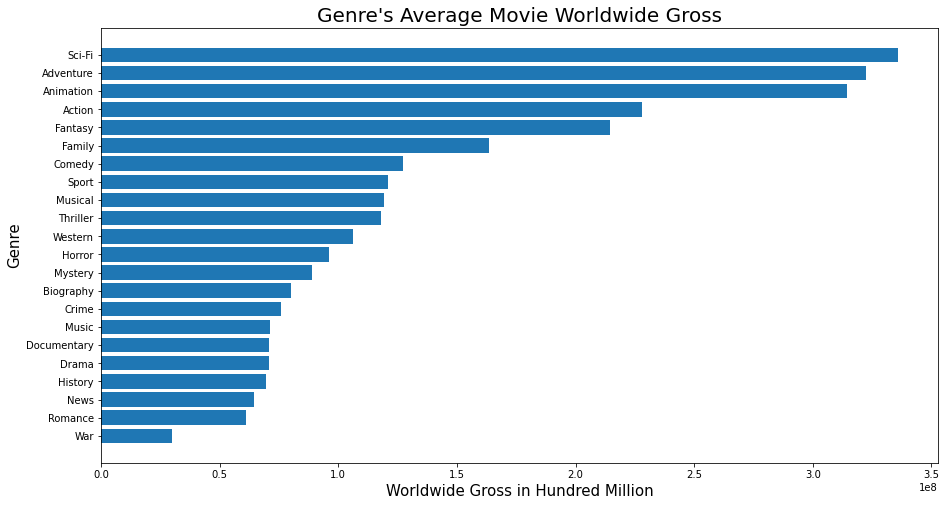

In [84]:
y_pos = np.arange(len(x_values))
plt.figure(figsize = (15,8))
plt.barh(genres_asc_rev[0], genres_asc_rev[1])
plt.ylabel('Genre', fontsize = 15)
plt.xlabel("Worldwide Gross in Hundred Million", fontsize = 15)
plt.title("Genre's Average Movie Worldwide Gross", fontsize = 20)

# Highest Grossing Movie Studio

In [85]:
studio_gross = updated_genres_df.groupby(['studio']).mean()
studio_gross

,Action,Drama,Thriller,Horror,Mystery,Comedy,History,Biography,Adventure,Romance,...,Sport,News,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
studio,,,,,,,,,,,,,,,,,,,,,
3D,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.0,2010.000000,41.000000,6.900000,364.000000,6.100000e+06,9.900000e+06,2010.000000,1.600000e+07
A24,0.062500,0.875000,0.187500,0.125,0.312500,0.250000,0.000000,0.12500,0.062500,0.125000,...,0.000000,0.0,2014.875000,108.000000,6.825000,118072.312500,1.349860e+07,1.220000e+07,2015.437500,2.569860e+07
AF,0.000000,1.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.50000,0.000000,0.000000,...,0.000000,0.0,2014.500000,101.500000,6.650000,6060.500000,1.000000e+06,3.100000e+06,2012.000000,4.100000e+06
AGF,0.000000,1.000000,1.000000,0.000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.0,2010.000000,95.000000,7.000000,25.000000,1.580000e+04,1.610000e+05,2011.000000,1.768000e+05
AR,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.0,2016.000000,118.000000,4.900000,811.000000,3.500000e+05,5.770000e+07,2016.000000,5.805000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOW,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.0,2010.000000,107.000000,7.700000,9940.000000,3.080000e+04,1.860000e+04,2010.000000,4.940000e+04
Wein.,0.086957,0.782609,0.101449,0.000,0.043478,0.347826,0.173913,0.26087,0.072464,0.202899,...,0.043478,0.0,2012.985507,111.289855,6.797101,98226.086957,2.276750e+07,3.451046e+07,2013.608696,5.727796e+07
Yash,0.666667,0.666667,0.500000,0.000,0.000000,0.166667,0.000000,0.00000,0.166667,0.166667,...,0.166667,0.0,2014.500000,145.000000,6.450000,24291.500000,4.073967e+06,4.912678e+07,2014.666667,5.320075e+07


In [86]:
total_studio_gross = studio_gross.sort_values('total_gross', ascending=True)

In [87]:
total_studio_gross

,Action,Drama,Thriller,Horror,Mystery,Comedy,History,Biography,Adventure,Romance,...,Sport,News,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
studio,,,,,,,,,,,,,,,,,,,,,
Crnth,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2011.000000,105.000000,6.200000,766.000000,1.130000e+04,2.700000e+04,2014.000000,3.830000e+04
WOW,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2010.000000,107.000000,7.700000,9940.000000,3.080000e+04,1.860000e+04,2010.000000,4.940000e+04
ITL,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2014.000000,76.000000,6.900000,112.000000,4.110000e+04,1.180000e+04,2015.000000,5.290000e+04
First,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2010.000000,100.000000,5.200000,1441.000000,2.000000e+03,5.360000e+04,2010.000000,5.560000e+04
FOAK,0.000000,1.000000,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,2010.000000,95.000000,5.100000,11069.000000,1.070000e+05,1.730000e+04,2010.000000,1.243000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WB,0.383929,0.508929,0.107143,0.044643,0.116071,0.3125,0.035714,0.080357,0.312500,0.080357,...,0.026786,0.0,2013.803571,112.803571,6.526786,192551.205357,9.440893e+07,1.365018e+08,2013.866071,2.309107e+08
GrtIndia,1.000000,1.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2017.000000,167.000000,8.300000,65656.000000,2.020000e+07,2.340000e+08,2017.000000,2.542000e+08
BV,0.322222,0.233333,0.033333,0.011111,0.000000,0.4000,0.055556,0.100000,0.622222,0.055556,...,0.044444,0.0,2013.822222,111.066667,6.942222,205468.444444,1.772078e+08,2.811394e+08,2014.022222,4.583472e+08


In [88]:
x_values = total_studio_gross.tail(10).index
y_values = total_studio_gross['total_gross'].tail(10)

Text(0.5, 1.0, 'Top 10 Highest Grossing Studios')

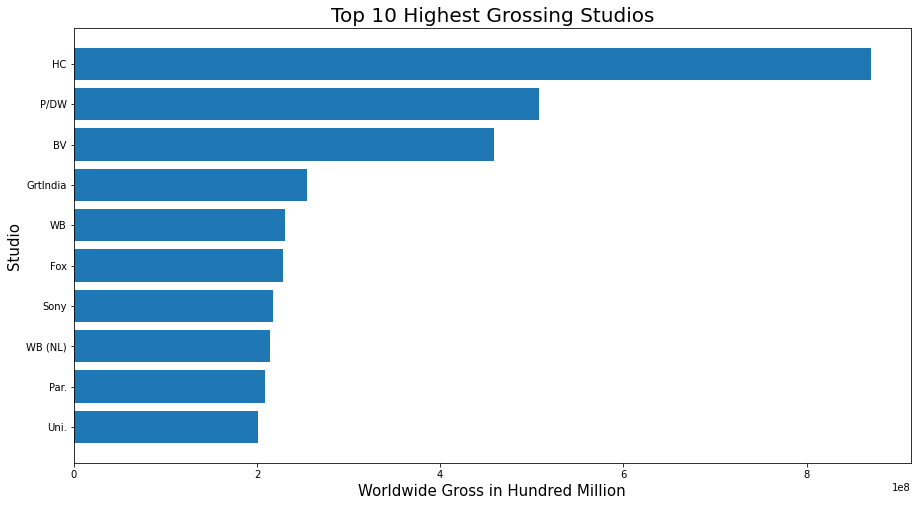

In [89]:
y_pos = np.arange(len(x_values))
plt.figure(figsize = (15,8))
plt.barh(x_values, y_values)
plt.ylabel('Studio', fontsize = 15)
plt.xlabel("Worldwide Gross in Hundred Million", fontsize = 15)
plt.title("Top 10 Highest Grossing Studios", fontsize = 20)

# Highest Grossing Director

In [54]:
#creating dataframes for the names of the crew members to eventually extract the director name
names = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
directors = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
director_name_gross = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

In [55]:
director_name_gross[director_name_gross['primary_name'] == 'Clint Eastwood']

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
24027,nm0000142,Clint Eastwood,1930.0,NaN,"actor,producer,director","tt0405159,tt0105695,tt1205489,tt0112579"


In [56]:
#joining the two datasets together
#director_df = names.set_index('tconst').join(directors.set_index('tconst'), how='inner')

In [57]:
#Doing the merge method since Claude likes this way better :)
director_df = names.merge(directors, on='tconst')

In [58]:
#naming the merge of the three datasets crew_members since it has all of the information from name to occupation
crew_members = director_df.merge(director_name_gross, on='nconst')
crew_members

,tconst,ordering,nconst,category,job,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",nm0398271,nm0398271,Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,nm0398271,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,nm0398271,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,nm0398271,nm0398271,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,nm0362736,nm0362736,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,NaN,NaN,"nm10439725,nm9652770","nm9652770,nm10439725,nm10439727",Phillippe Warner,NaN,NaN,NaN,NaN
1027908,tt9689618,5,nm10439725,director,NaN,NaN,"nm10439725,nm9652770","nm9652770,nm10439725,nm10439727",Xavi Herrero,NaN,NaN,"director,writer,cinematographer",tt9689618
1027909,tt9692684,3,nm10441594,director,NaN,NaN,nm10441594,nm6009913,Guy Jones,NaN,NaN,director,NaN
1027910,tt9692684,4,nm6009913,writer,writer,NaN,nm10441594,nm6009913,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [59]:
#merging another dataset into the crew_members one to add the tconst 
all_data = crew_members.merge(df3, on='tconst')
all_data

,tconst,ordering,nconst,category,job,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,NaN,NaN,nm0362736,nm0362736,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
1,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",nm0362736,nm0362736,Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
2,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]",nm0362736,nm0362736,Henry Garrett,NaN,NaN,actor,"tt1441953,tt1790885,tt2639254,tt3839822",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
3,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",nm0362736,nm0362736,Graham McTavish,1961.0,NaN,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
4,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",nm0362736,nm0362736,Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564262,tt7696448,3,nm10313896,self,NaN,"[""Himself""]",nm4300391,NaN,Ish ShaBazz,NaN,NaN,NaN,tt7696448,App: The Human Story,App: The Human Story,2017,70.0,Documentary,8.6,9
564263,tt7696448,4,nm4300391,director,NaN,NaN,nm4300391,NaN,Jake Schumacher,NaN,NaN,"director,sound_department,cinematographer","tt1833217,tt7696448",App: The Human Story,App: The Human Story,2017,70.0,Documentary,8.6,9
564264,tt7696448,5,nm1334745,producer,producer,NaN,nm4300391,NaN,Adam Lisagor,NaN,NaN,"visual_effects,producer,editorial_department","tt0402022,tt0319262,tt0373469,tt0800080",App: The Human Story,App: The Human Story,2017,70.0,Documentary,8.6,9
564265,tt7696448,6,nm9458173,composer,NaN,NaN,nm4300391,NaN,Enoch Kim,NaN,NaN,composer,tt7696448,App: The Human Story,App: The Human Story,2017,70.0,Documentary,8.6,9


In [60]:
df_gross_director = all_data.set_index('primary_title').join(df.set_index('title'), how='inner').reset_index()
df_gross_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17210 entries, 0 to 17209
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               17210 non-null  object 
 1   tconst              17210 non-null  object 
 2   ordering            17210 non-null  int64  
 3   nconst              17210 non-null  object 
 4   category            17210 non-null  object 
 5   job                 6370 non-null   object 
 6   characters          6845 non-null   object 
 7   directors           17202 non-null  object 
 8   writers             16864 non-null  object 
 9   primary_name        17210 non-null  object 
 10  birth_year          10602 non-null  float64
 11  death_year          393 non-null    float64
 12  primary_profession  17126 non-null  object 
 13  known_for_titles    17168 non-null  object 
 14  original_title      17210 non-null  object 
 15  start_year          17210 non-null  int64  
 16  runt

In [61]:
df_gross_director['total_gross'] = df_gross_director['domestic_gross'] + df_gross_director['foreign_gross']

In [62]:
#separating the directors out of other strings in primary_profession
df_gross_director['primary_profession'].fillna('').apply(lambda x: 'director' in x)

0        False
1        False
2        False
3        False
4        False
         ...  
17205     True
17206    False
17207    False
17208    False
17209    False
Name: primary_profession, Length: 17210, dtype: bool

In [63]:
#fill in the missing values and only return the director string from the primary_profession column
directors_only = df_gross_director[df_gross_director['primary_profession'].fillna('').apply(lambda x: 'director' in x)]
directors_only

,index,tconst,ordering,nconst,category,job,characters,directors,writers,primary_name,...,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
6,'71,tt2614684,5,nm1312919,director,NaN,NaN,nm1312919,nm2954373,Yann Demange,...,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015,1.655000e+06
16,10 Cloverfield Lane,tt1179933,5,nm0870469,director,NaN,NaN,nm0870469,"nm1061091,nm1173295,nm3227090",Dan Trachtenberg,...,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016,1.102000e+08
19,10 Cloverfield Lane,tt1179933,8,nm3227090,writer,screenplay by,NaN,nm0870469,"nm1061091,nm1173295,nm3227090",Damien Chazelle,...,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016,1.102000e+08
21,102 Not Out,tt6580564,10,nm1841544,production_designer,NaN,NaN,nm1084488,nm5030702,Mansi Dhruv Mehta,...,2018,102.0,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000.0,2018,1.220000e+07
24,102 Not Out,tt6580564,8,nm2590164,cinematographer,NaN,NaN,nm1084488,nm5030702,Laxman Utekar,...,2018,102.0,"Comedy,Drama",7.5,4802,Sony,1300000.0,10900000.0,2018,1.220000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17198,Zoolander 2,tt1608290,10,nm0542802,producer,producer,NaN,nm0001774,"nm0857620,nm0001774,nm0831557,nm0357453,nm0766153",Jeff Mann,...,2016,101.0,Comedy,4.7,59914,Par.,28800000.0,27900000.0,2016,5.670000e+07
17200,Zootopia,tt2948356,6,nm0601781,director,NaN,NaN,"nm1158544,nm0397174,nm0601781","nm0397174,nm0601781,nm1158544,nm0714114,nm2888...",Rich Moore,...,2016,108.0,"Adventure,Animation,Comedy",8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09
17202,Zootopia,tt2948356,8,nm0714114,writer,story by,NaN,"nm1158544,nm0397174,nm0601781","nm0397174,nm0601781,nm1158544,nm0714114,nm2888...",Jim Reardon,...,2016,108.0,"Adventure,Animation,Comedy",8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09
17203,Zootopia,tt2948356,2,nm0000867,actor,NaN,"[""Nick Wilde""]","nm1158544,nm0397174,nm0601781","nm0397174,nm0601781,nm1158544,nm0714114,nm2888...",Jason Bateman,...,2016,108.0,"Adventure,Animation,Comedy",8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09


In [64]:
#finding the top 10 directors who directed the most movies
directors_only['primary_name'].value_counts().head(10)


Michael Bay         13
Adam McKay          13
Scott Rudin         13
Ridley Scott        12
Ben Stiller         12
Shawn Levy          11
Luc Besson          11
Forest Whitaker     11
Evan Goldberg       11
Nicholas Stoller    11
Name: primary_name, dtype: int64

In [65]:
#function to create a list of top directors
def top_x_directors(data, x):
    directors = data['primary_name'].value_counts().head(x).index
    return directors
top_x_directors(directors_only, 10)

Index(['Michael Bay', 'Adam McKay', 'Scott Rudin', 'Ridley Scott',
       'Ben Stiller', 'Shawn Levy', 'Luc Besson', 'Forest Whitaker',
       'Evan Goldberg', 'Nicholas Stoller'],
      dtype='object')

In [72]:
#function to calculate the average total gross for each director
def mean_gross(list):
    avg = []
    for name in list:
        for value in directors_only[directors_only['primary_name'] == name][['total_gross', 'primary_name']].mean():
            avg.append(value)
    return avg
mean_gross(top_x_directors(directors_only, 10))

[351030769.15384614,
 135305153.84615386,
 83569230.76923077,
 175483308.33333334,
 172716666.66666666,
 135145454.54545453,
 157805000.0,
 84952545.45454545,
 98109090.9090909,
 136236363.63636363]

In [73]:
#double checking to see if there is any missing data
directors_only['total_gross'].isna().any()

False

In [74]:
directors_only['total_gross'].mean()

129834744.31225638

In [75]:
directors_asc = pd.DataFrame([x_values, y_values]).T
directors_asc.sort_values(1, inplace=True)
directors_asc

,0,1
2,Scott Rudin,8.35692e+07
7,Forest Whitaker,8.49525e+07
8,Evan Goldberg,9.81091e+07
5,Shawn Levy,1.35145e+08
1,Adam McKay,1.35305e+08
9,Nicholas Stoller,1.36236e+08
6,Luc Besson,1.57805e+08
4,Ben Stiller,1.72717e+08
3,Ridley Scott,1.75483e+08
0,Michael Bay,3.51031e+08


In [76]:
x_values = top_x_directors(directors_only, 10)
y_values = mean_gross(top_x_directors(directors_only, 10))

Text(0.5, 1.0, 'Top 10 Highest Grossing Directors')

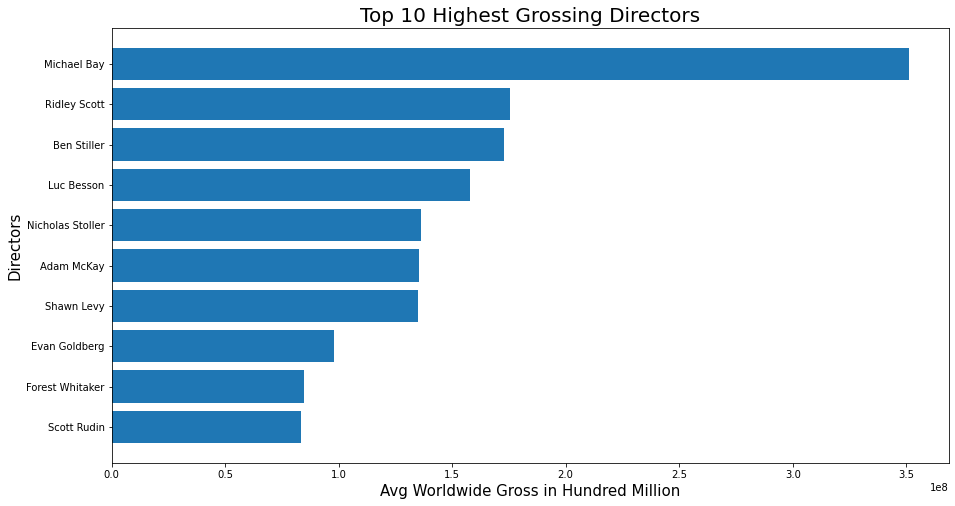

In [77]:


plt.figure(figsize = (15,8))
plt.barh(directors_asc[0], directors_asc[1])
plt.ylabel('Directors', fontsize = 15)
plt.xlabel("Avg Worldwide Gross in Hundred Million", fontsize = 15)
plt.title("Top 10 Highest Grossing Directors", fontsize = 20)